# Types of Athletes

Throughout the history of the modern Olympic Games, the number of sports and events included in the games has shifted, increasing in number throughout the past 124 years, but recently capped at 28 events per summer games. Many events have come and gone from the games, dismissed from the program, although sometimes reinstated years later. Only athletics, aquatics, cycling, fencing, and gymnastics have been present in every occurrence of the games. Prior to 1994, summer and winter events were held in the same year, although now they alternate every two years. Needless to say, the Olympic Games have faced many changes and variations as they have adapted and evolved to a changing culture. Below, we will explore some of the trends evident in the sports and the types of athletes these events bring to the games.

In the following section, we will explore the following questions:
- Which sports have had the most athletes over time?
- How do the average age, height, and weight differ for athletes of each sport?
- What trends exist in the height-weight correlation and BMI for athletes of each sport?
- Are basketball players' heights significantly greater than other athletes?
- Are rythmic gymnasts significantly lighter than other athletes?

To start, we upload the cleaned dataframe from our introduction section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
Unnamed: 0    271116 non-null int64
ID            271116 non-null int64
Name          271116 non-null object
Sex           271116 non-null object
Age           271116 non-null float64
Height        271116 non-null float64
Weight        271116 non-null float64
Team          271116 non-null object
NOC           271116 non-null object
Games         271116 non-null object
Year          271116 non-null int64
Season        271116 non-null object
City          271116 non-null object
Sport         271116 non-null object
Event         271116 non-null object
Medal         271116 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 33.1+ MB


In [4]:
data.Sport.value_counts()

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C

The value counts above indicate that 66 sports have existed throughout the history of the Olympic Games. Athletics top this list with 38,624 athletes total. Gymnastics and swimming take silver and bronze here, with 26,707 and 23,195 total athletes, respectively. Other sports with over 10,000 athletes include shooting, cycling, fencing, and rowing. As we know from above, all five of the sports that have never missed an occurrence of the Olympic Games are included in this list. Sports with notably few athletes (less than 20) - most likely due to their removal from the games or brief presence as a demonstration event - include aeronautics, basque pelota, roque, jeu de paume, racquets, motorboating, and croquet.

In [6]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


For our analysis below, we add a column for athlete BMI, calculated using the formula BMI = weight/height^2.

In [7]:
data['BMI']=data['Weight']/((data['Height']/100)**2)

## Number of Athletes per Sport

### Which sports have had the most athletes over time?

Given the difference in popularity, size, and history of the summer and winter Olympic games, we divide them into separate datasets for the heatmap visualizations below.

In [5]:
summer_data = data[data['Season']=='Summer']
winter_data = data[data['Season']=='Winter']

In [6]:
sheatmap_data = pd.DataFrame(summer_data.groupby(['Year','Sport']).count())
wheatmap_data = pd.DataFrame(winter_data.groupby(['Year','Sport']).count())

In [8]:
sheatmap_data = pd.DataFrame(sheatmap_data['ID'])
wheatmap_data = pd.DataFrame(wheatmap_data['ID'])

In [9]:
sheatmap_data.reset_index(inplace=True)
wheatmap_data.reset_index(inplace=True)

By grouping our data by year and secondarily by sport, we can create the heatmaps below to visualize how the number of athletes per sport has changed over time in each variation of the Olympic Games.

In [10]:
sheatmap_data.head()

,Year,Sport,ID
0,1896,Athletics,106
1,1896,Cycling,41
2,1896,Fencing,15
3,1896,Gymnastics,97
4,1896,Shooting,65


In [11]:
wheatmap_data.sort_values('Year',ascending=True,inplace=True)

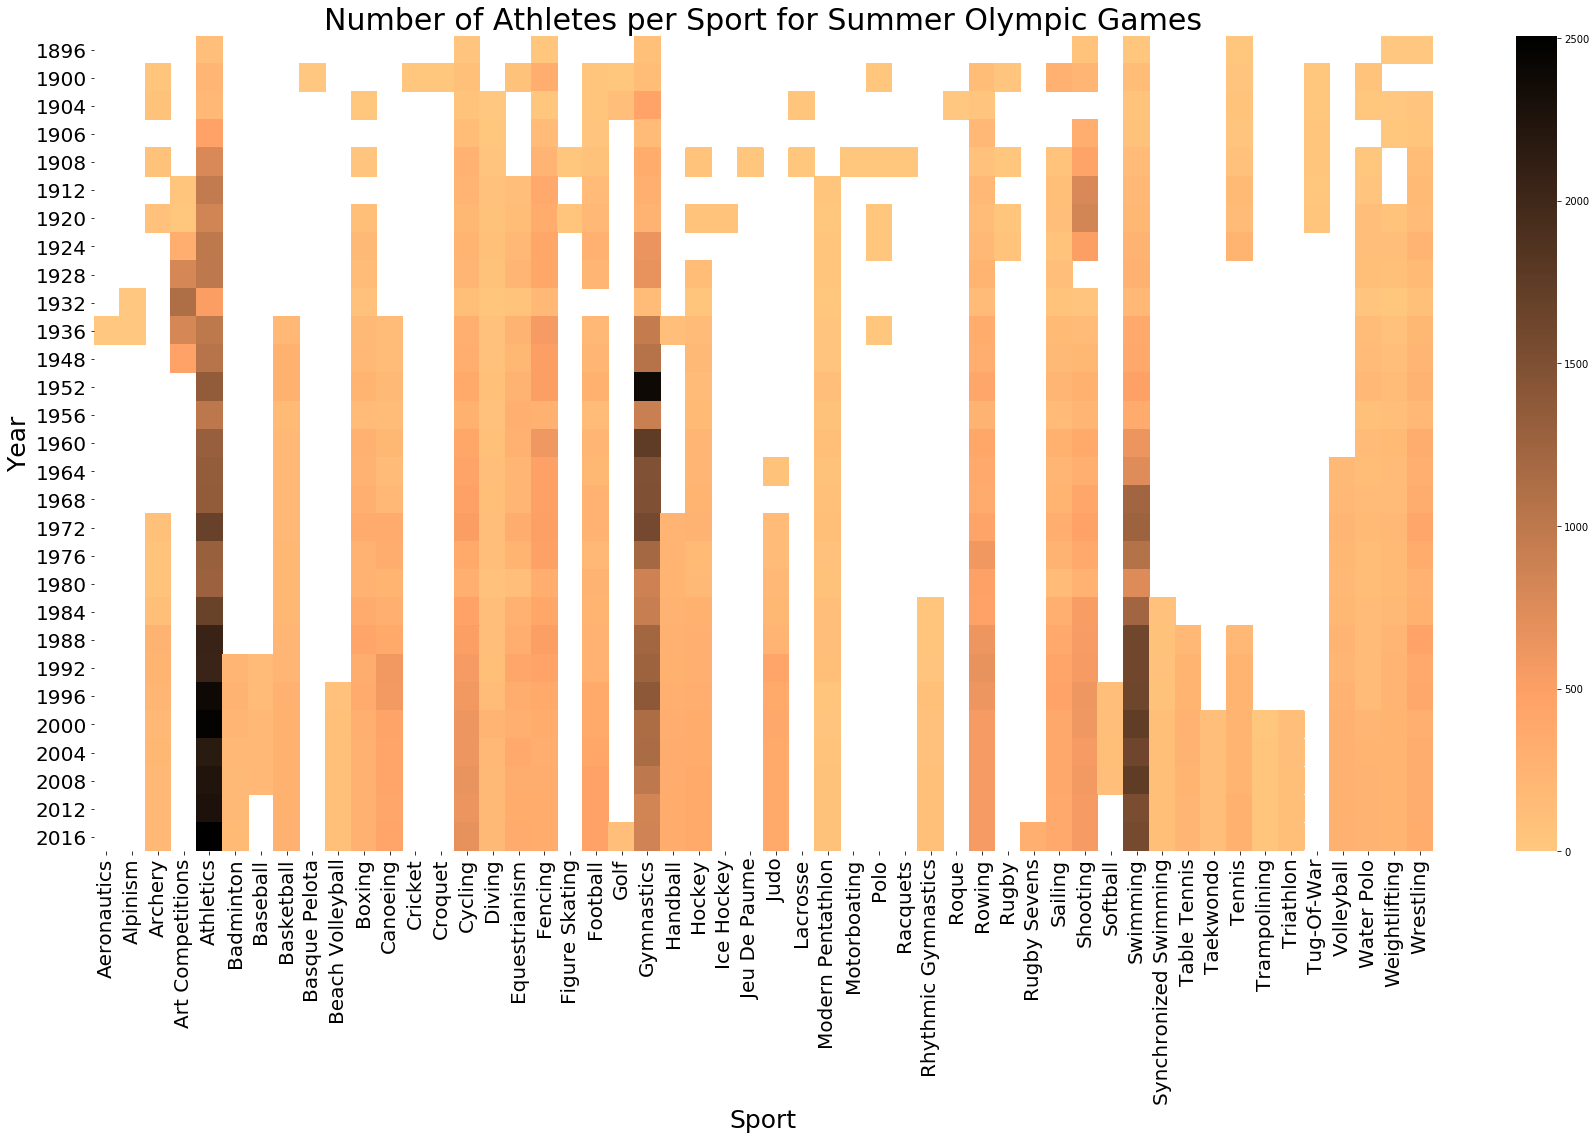

In [12]:
sdf_heatmap = sheatmap_data.pivot_table(values='ID',index='Year',columns='Sport')
plt.figure(figsize=(30,15))
sns.heatmap(sdf_heatmap,annot=False,cmap="copper_r")
plt.yticks(rotation=0,size=20)
plt.xticks(size=20)
plt.ylabel('Year',size=25)
plt.xlabel('Sport',size=25)
plt.title('Number of Athletes per Sport for Summer Olympic Games', size=30)
plt.show()

Our summer games heatmap above illustrates how each event has changed over time, darkening with an increasing number of athletes for that particular year and left white if no athletes participated in that given event. Notable trends include:
- Athletics, cycling, fencing, gymnastics, and swimming have atheletes for every games in the past 124 years.
- Athletics (track & field) gets increasingly darker over time, indicating the increasing size of this event category.
- Gymnastics had a huge year of athlete participation in 1952, and has since decreased considerably.
- Similar to athletics, swimming has grown substantainally over time, though to a less degree than athletics.
- Aeronautics, cricket, croquet, basque pelota, and jeu de paume made a single appearance in the games.

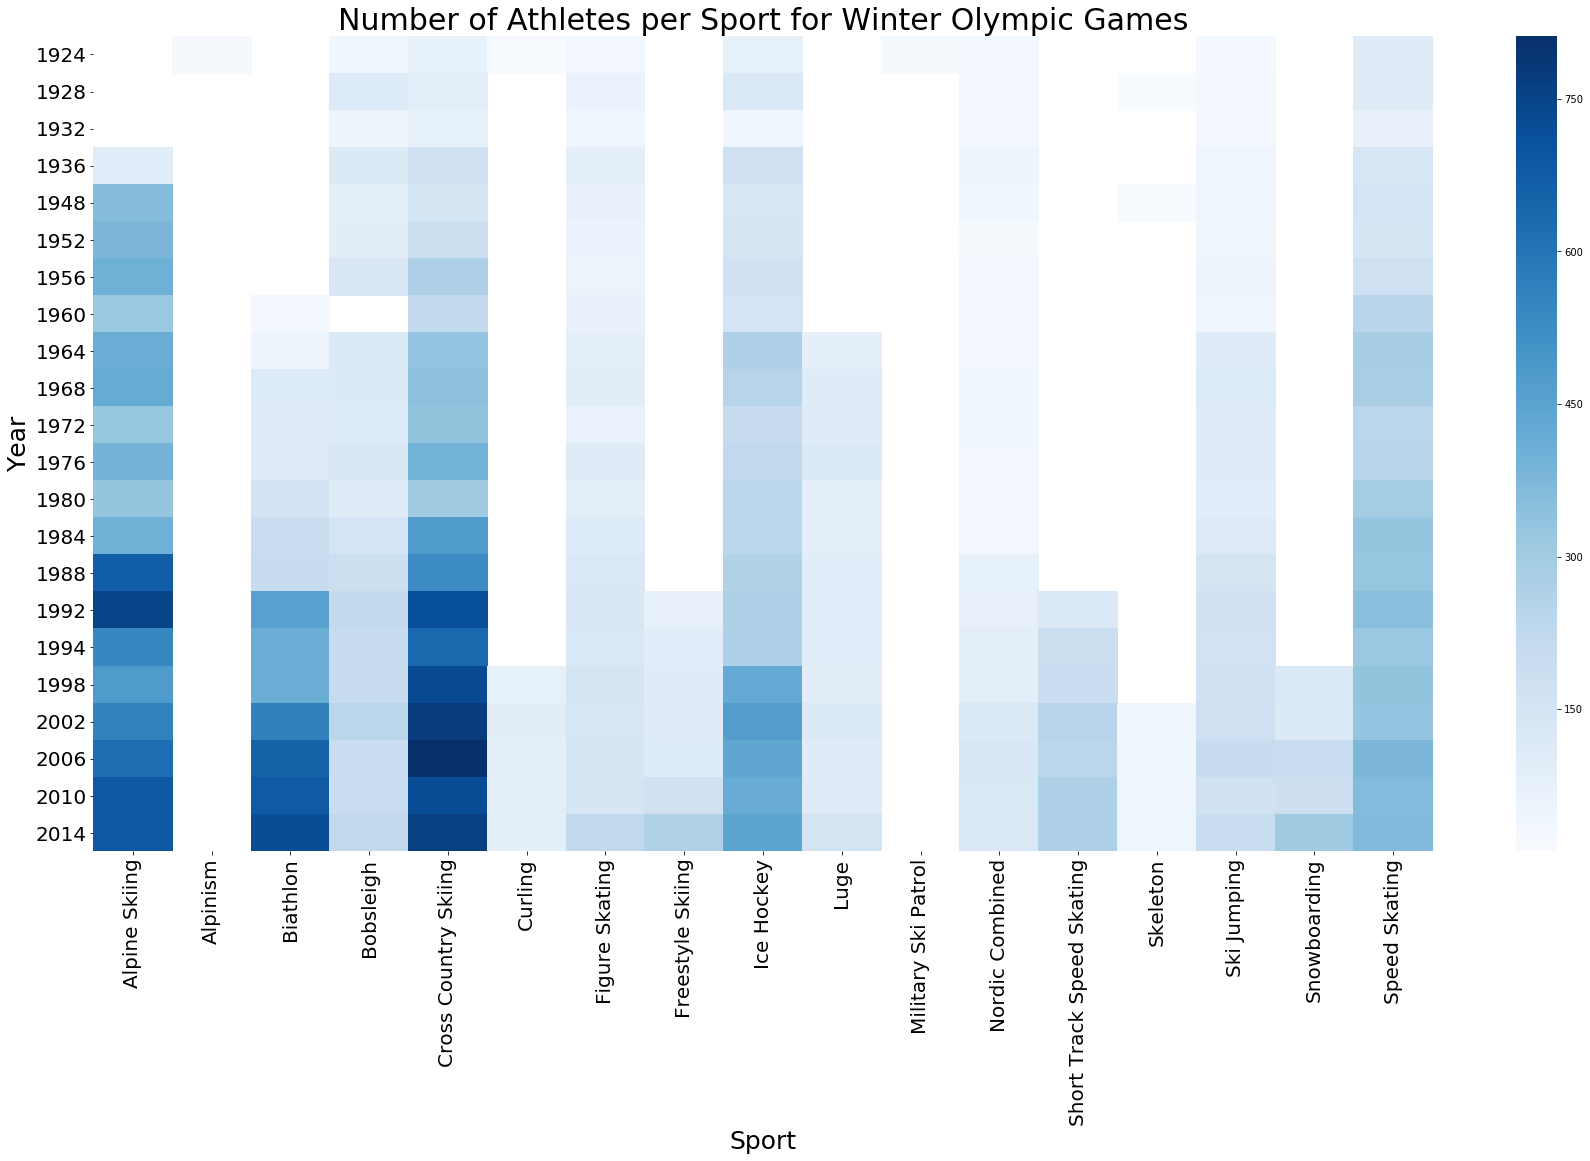

In [13]:
wdf_heatmap = wheatmap_data.pivot_table(values='ID',index='Year',columns='Sport')
plt.figure(figsize=(30,15))
sns.heatmap(wdf_heatmap,annot=False,cmap="Blues")
plt.yticks(rotation=0,size=20)
plt.xticks(size=20)
plt.ylabel('Year',size=25)
plt.xlabel('Sport',size=25)
plt.title('Number of Athletes per Sport for Winter Olympic Games', size=30)
plt.show()

Our winter games heatmap above illustrates how each event has changed over time, darkening with an increasing number of athletes for that particular year and left white if no athletes participated in that given event. Notable trends include:
- Since the start of winter games events in 1924, cross country skiing, figure skating, ice hockey, nordic combined, ski jumping, and speed skating have never missed a year.
- With the exception of alpinism and military ski patrol after 1924, events are not really removed from the winter games. The number of events has slowly increased throughout its history, and now boasts 15 events.
- Alpine skiing, cross country skiing, and the biathlon (ski shooting) dominate the games with near 750 athletes each in recent games.
- Curling and skeleton were present in the early winter games, but only recently reintroduced into the program.

## Mean Data per Sport

### How do the average age, height, and weight differ for athletes of each sport?

Below, we will analyze how athlete characteristics differ based on sport. First, we group the data by sport and calculate the mean for each row.

In [14]:
sport_mean_data = data.groupby('Sport').mean()

In [15]:
sport_mean_data.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [16]:
sport_mean_data

,Age,Height,Weight,Year,BMI
Sport,,,,,
Aeronautics,26.000000,179.000000,74.000000,1936.000000,23.095409
Alpine Skiing,23.212482,174.062068,71.263280,1985.203534,23.404670
Alpinism,33.480000,178.560000,73.400000,1925.600000,23.007760
Archery,27.800343,173.660240,69.934876,1987.533847,23.081153
Art Competitions,42.797652,177.772219,72.439352,1933.179430,22.890842
Athletics,25.127641,176.479831,69.732627,1975.040182,22.211972
Badminton,25.671242,173.919698,67.727865,2003.039121,22.298319
Baseball,26.238255,182.406040,85.092282,2000.416107,25.539396
Basketball,25.270282,189.143739,83.387346,1981.830688,23.150216


In [17]:
sport_mean_data.reset_index(inplace=True)

### Age

In [18]:
sport_mean_data.sort_values('Age',ascending=False,inplace=True)

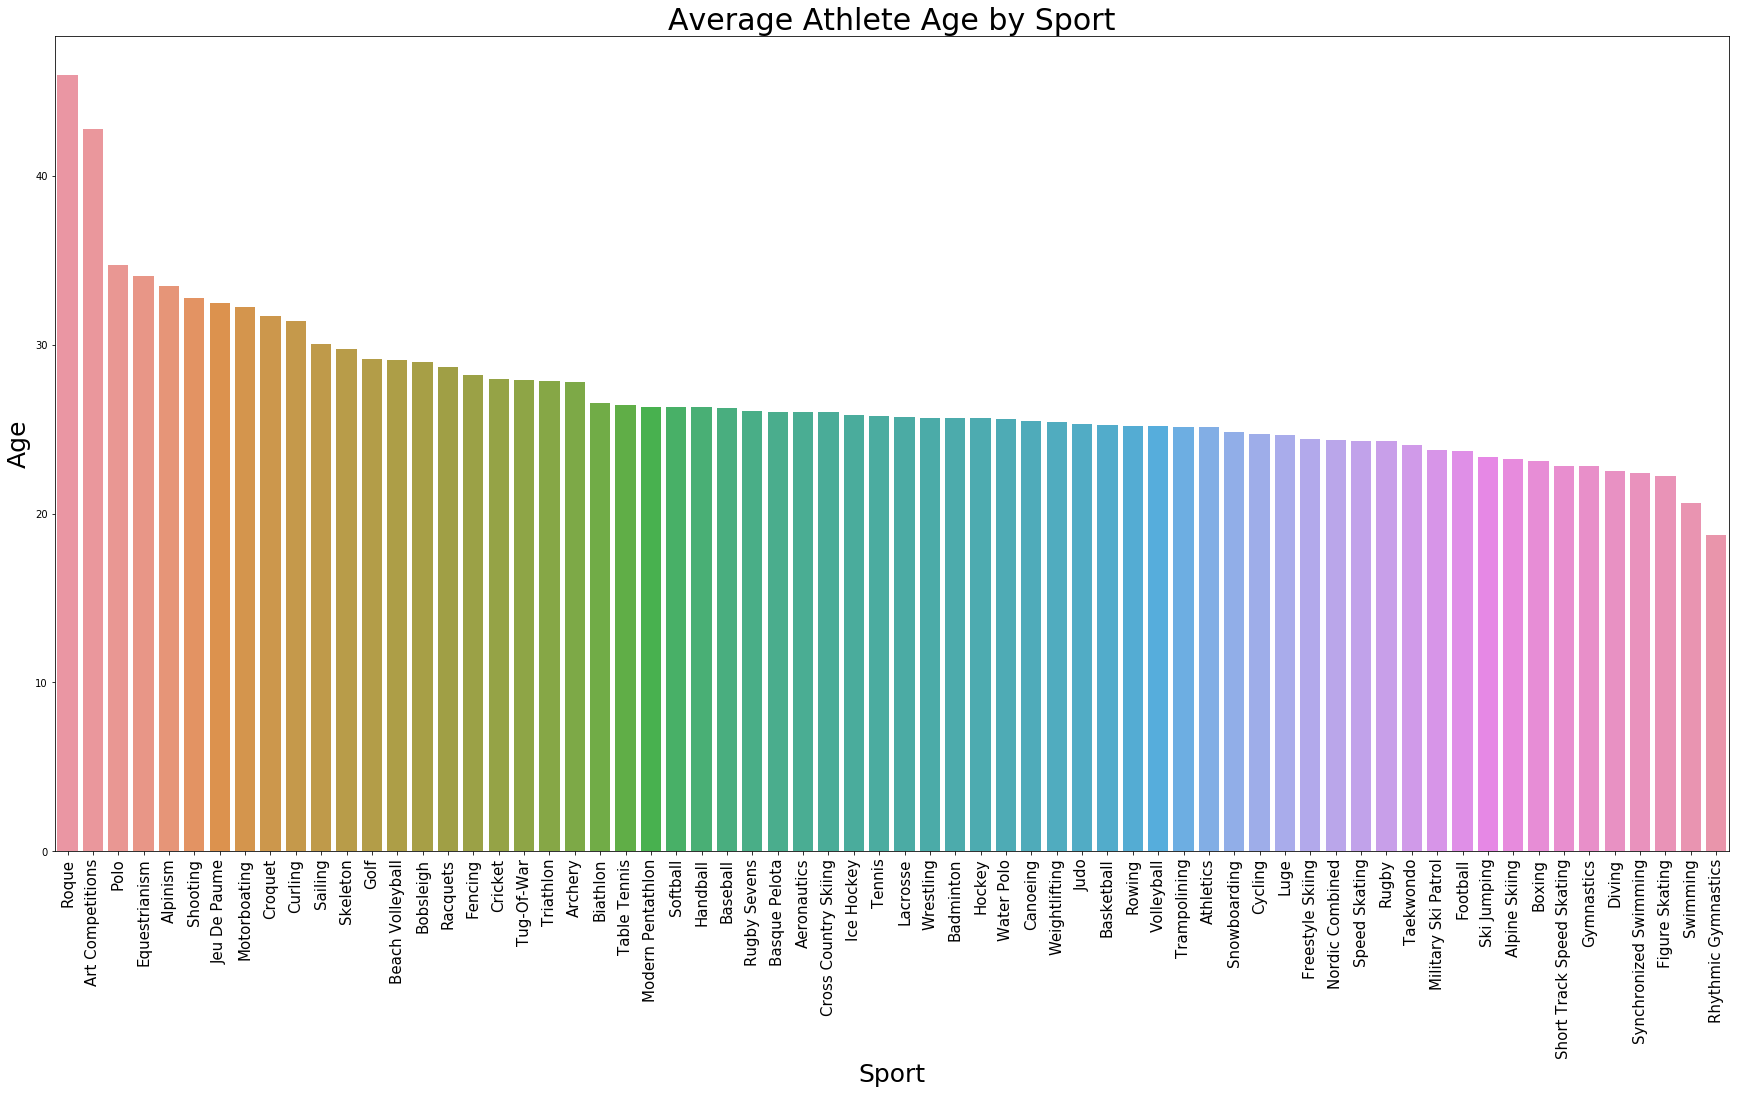

In [19]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(sport_mean_data['Sport'],sport_mean_data['Age'],ci=False)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('Age',size=25)
plt.title('Average Athlete Age by Sport',fontsize=30)
plt.show()

In [25]:
print('Average age of all athletes:',round(data.Age.mean(),2))

Average age of all athletes: 25.5


In the barplot above, sports are ranked in descending order based on average age. Rouge and art competitions, both events that have since been removed from the program, have athletes with average ages significantly higher than any other sport. Gymnastics, swimming events, and skating all have the lowest average ages for athletes compared to other events.

### Height

In [26]:
sport_mean_data.sort_values('Height',ascending=False,inplace=True)

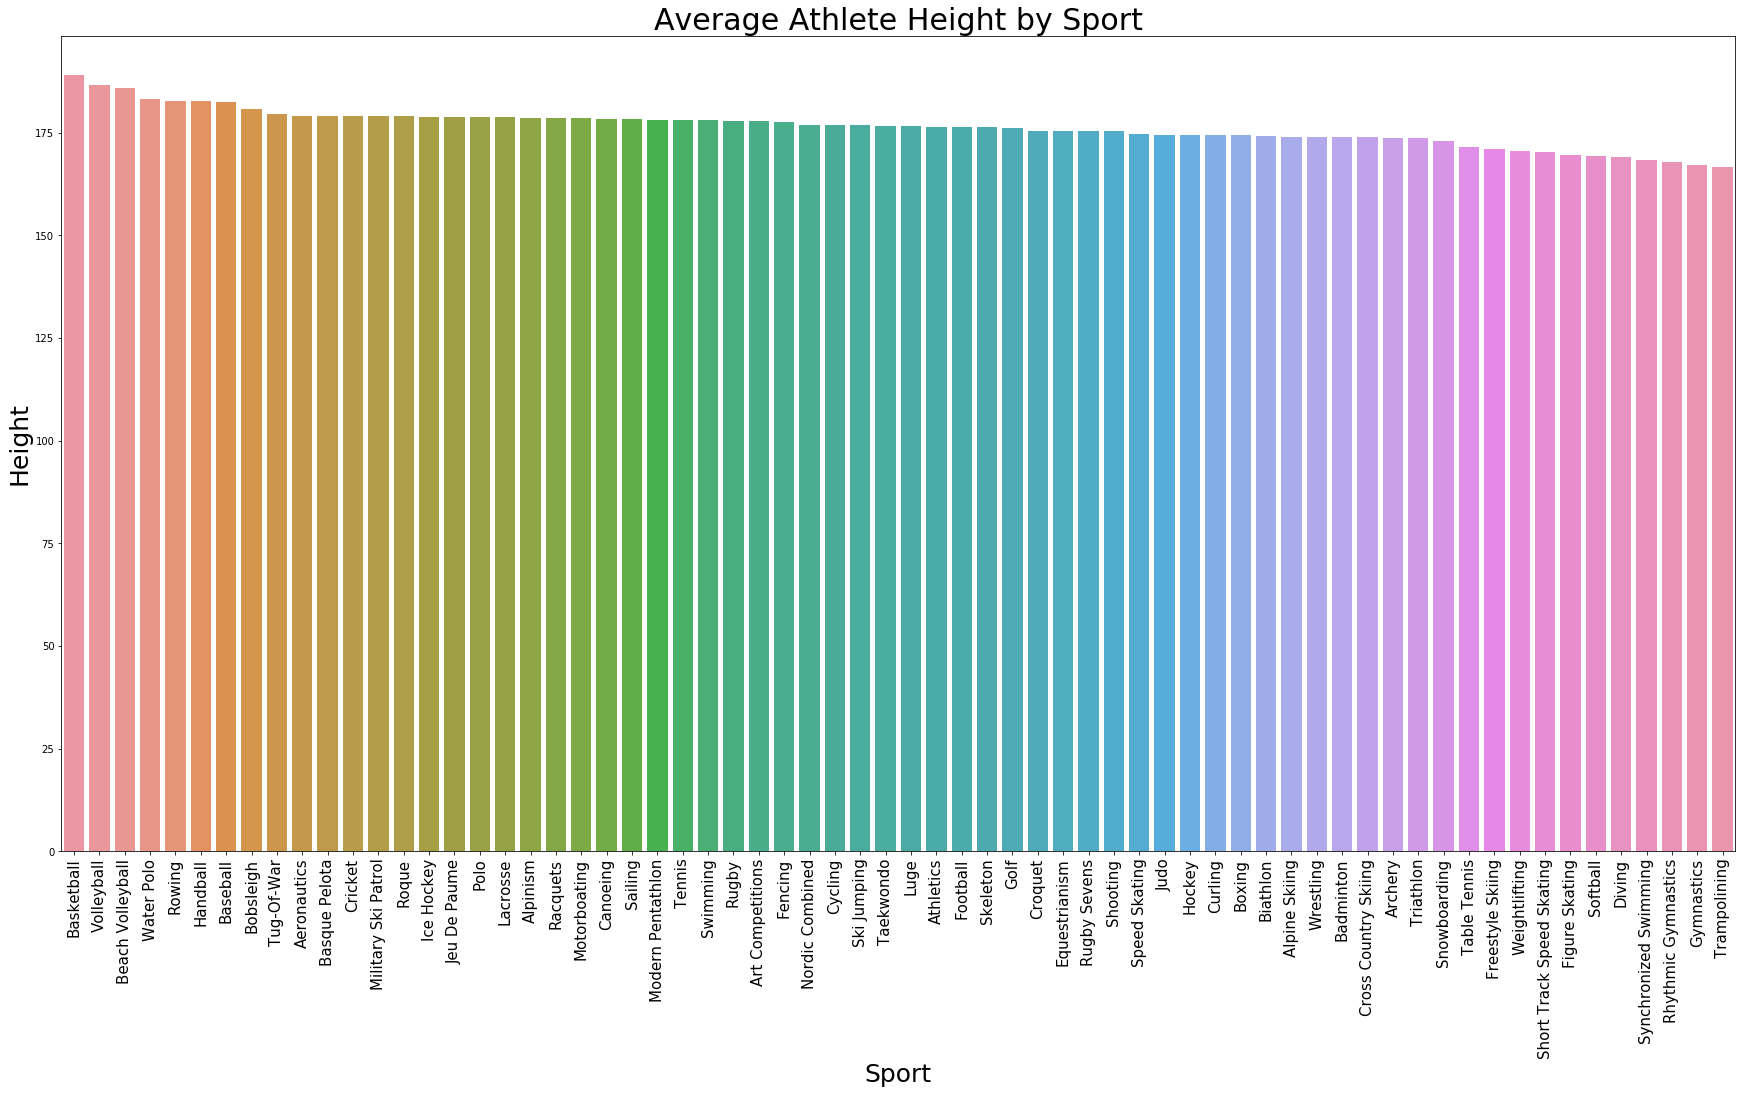

In [27]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(sport_mean_data['Sport'],sport_mean_data['Height'],ci=False)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('Height',size=25)
plt.title('Average Athlete Height by Sport',fontsize=30)
plt.show()

In [28]:
print('Average age of all athletes:',round(data.Height.mean(),2))

Average age of all athletes: 175.86


In the barplot above, sports are ranked in descending order based on average height. Basketball players have the greatest average height of all sports; below we will explore whether this difference is signficant. Overall, the average height does not differ nearly as much as the average age. Most sports appear to hover relatively near the overall average of 175.86 cm, with only gymnasts, swimmers, and skaters once again falling at the lower end.

### Weight

In [30]:
sport_mean_data.sort_values('Weight',ascending=False,inplace=True)

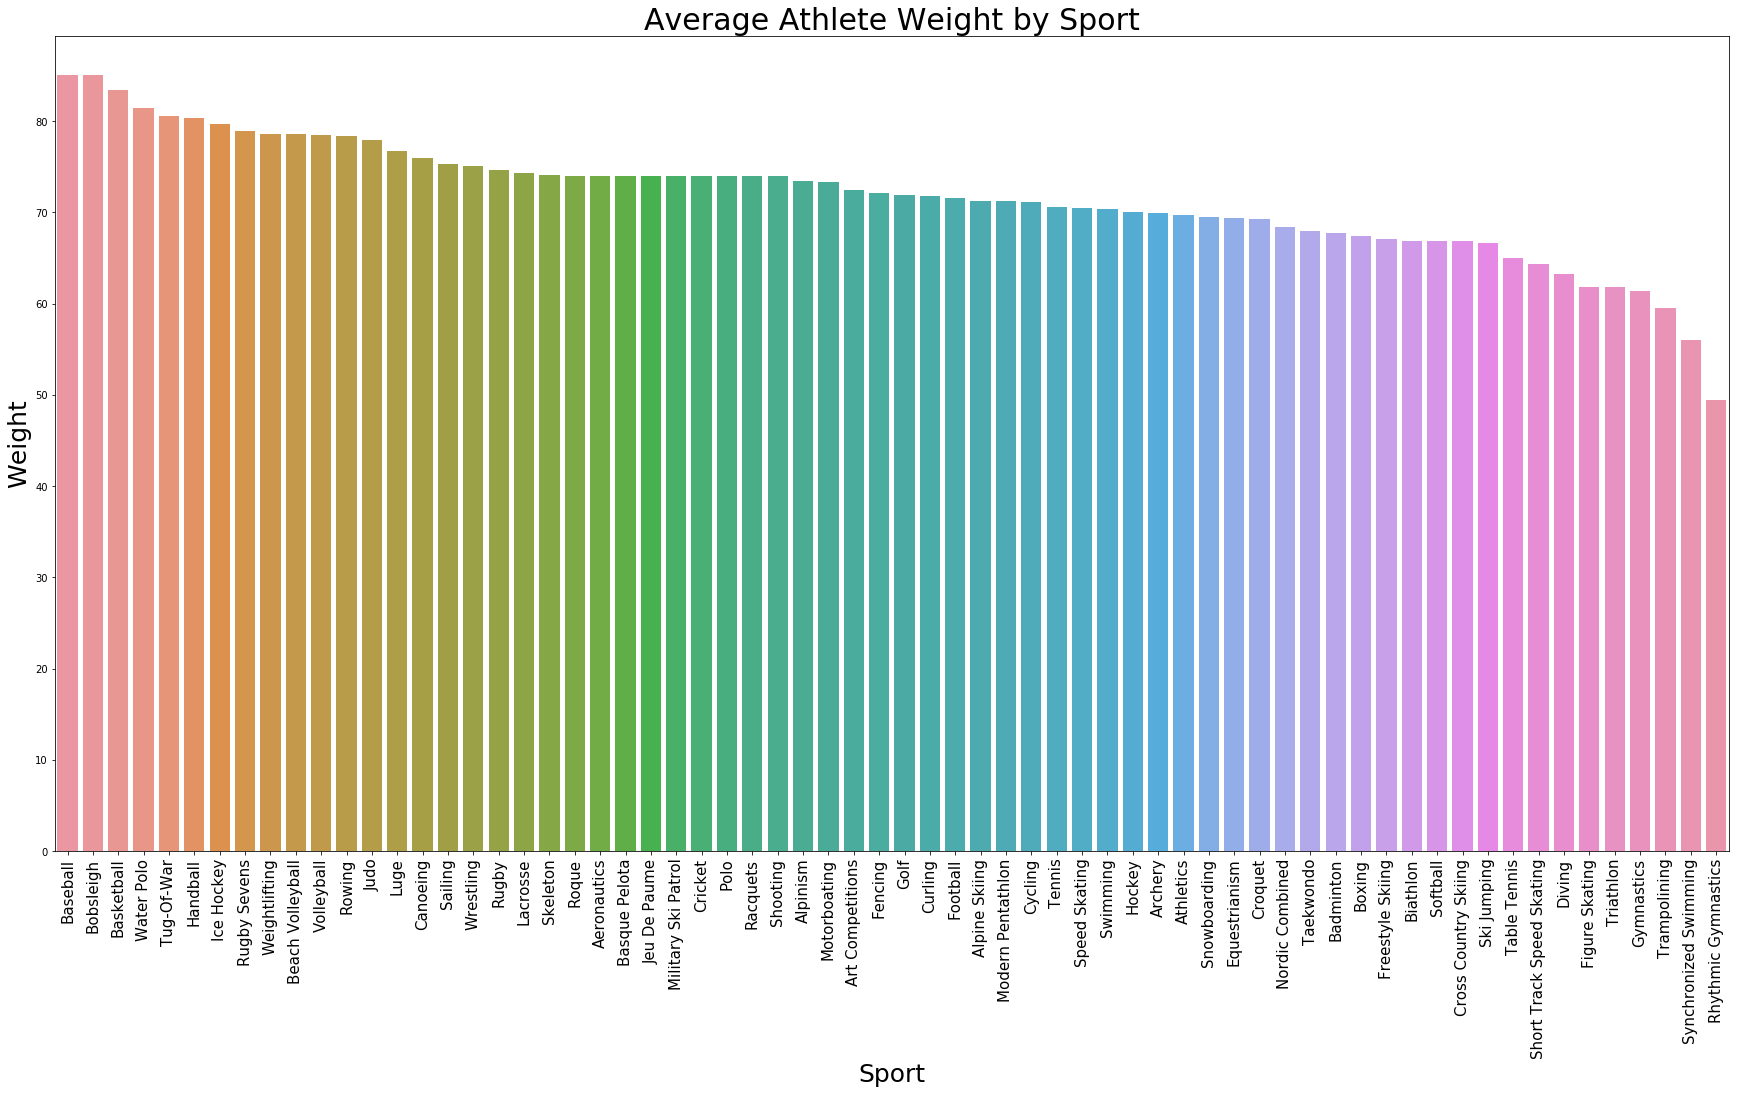

In [31]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(sport_mean_data['Sport'],sport_mean_data['Weight'],ci=False)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('Weight',size=25)
plt.title('Average Athlete Weight by Sport',fontsize=30)
plt.show()

In [34]:
print('Average age of all athletes:',round(data.Weight.mean(),2))

Average age of all athletes: 71.04


In the barplot above, sports are ranked in descending order based on average weight. There appears to be more variation among sports here than in the height barplot, although still not nearly as much as with age. Rythmic gynmasts seem to be much lighter than athletes in any other sport; below we will explore whether this difference is statistically significant. Baseball, bobsleigh, and basketball athletes are the top three heaviest categories. For basketball players, this may be due to the added height we noticed above, but for the other two, they may have higher than average BMI scores. We will explore this next .

## What trends exist in the height-weight correlation and BMI for athletes of each sport?

### Height-Weight Correlation

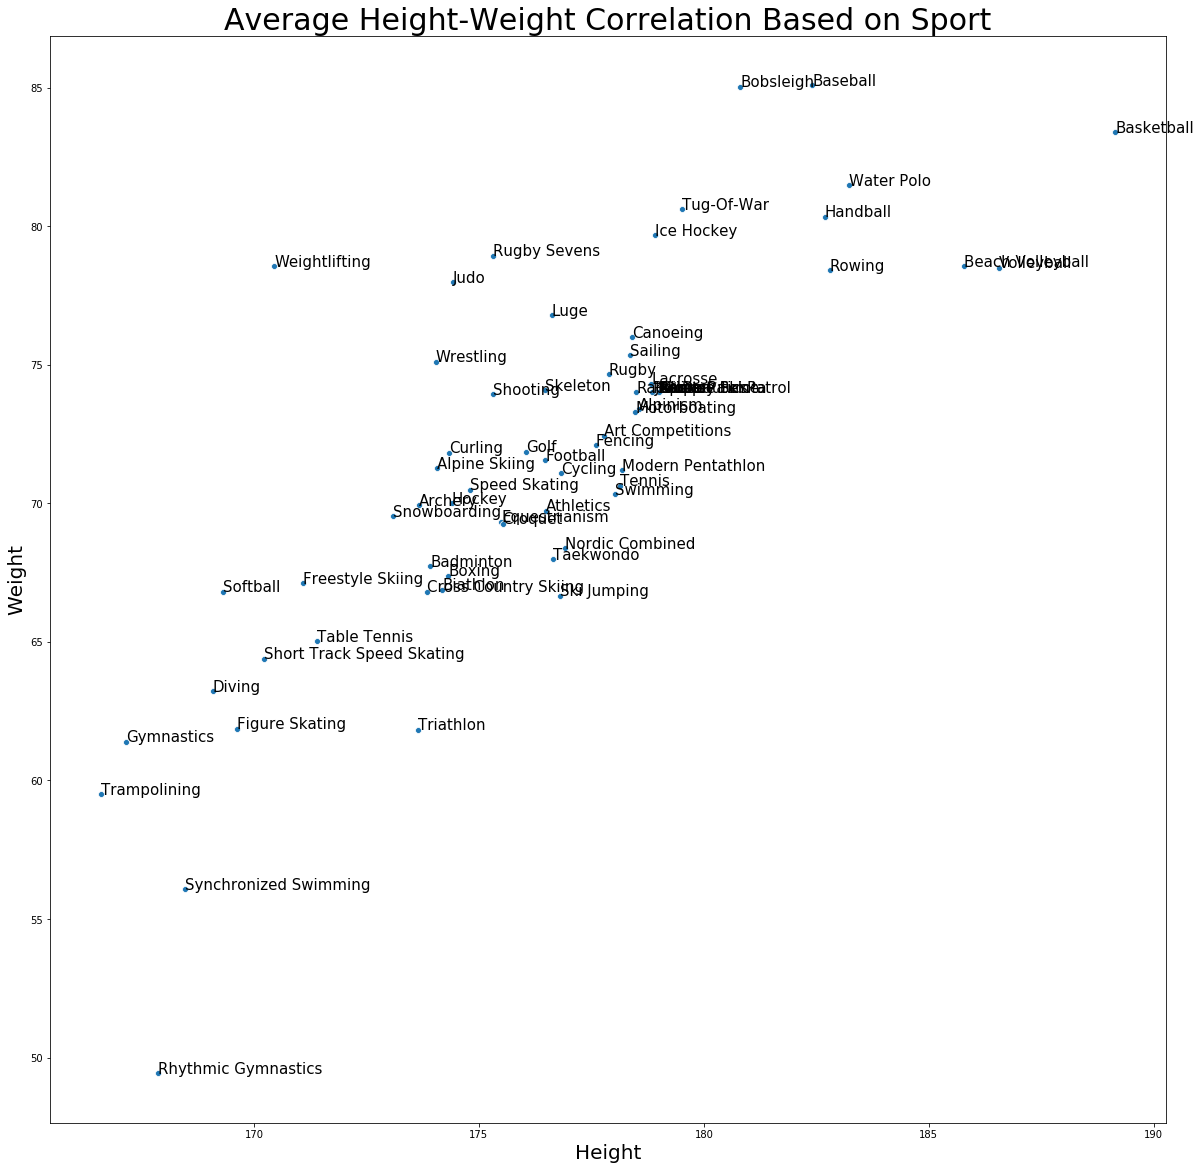

In [33]:
plt.figure(figsize=(20,20))
sns.scatterplot(sport_mean_data['Height'],sport_mean_data['Weight'])
plt.xlabel('Height',size=20)
plt.ylabel('Weight',size=20)
plt.title('Average Height-Weight Correlation Based on Sport',size=30)

texts = list(sport_mean_data.Sport)
x = list(sport_mean_data['Height'])
y = list(sport_mean_data['Weight'])
for i,text in enumerate(texts):
    xval = x[i]
    yval = y[i]
    plt.annotate(text, xy=(xval,yval), fontsize=15)

The plot above displays the correlation between average height and average weight for each sport. While we would expect that for the general population, these points would form a straight line, we see that many of the points here diverge from the typical pattern, due to the particular characteristics of athletes specilizing in different sports. For example:
- Weightlifters weigh much more for their given height than other athletes.
- Bobsledders and baseball players have a similar pattern to weightlifters, just at a greater height.
- Although basketball players weight significantly more than most athletes, this balances with their extraordinary height, and they actually fall in line with the typical pattern of correlation between the two.
- Rhythmic gynmasts and synchronized swimmers weight much less than other athletes of their height.
- Volleyball players are some of the tallest athletes, but weigh slightly less than would be expected for athletes of that height.

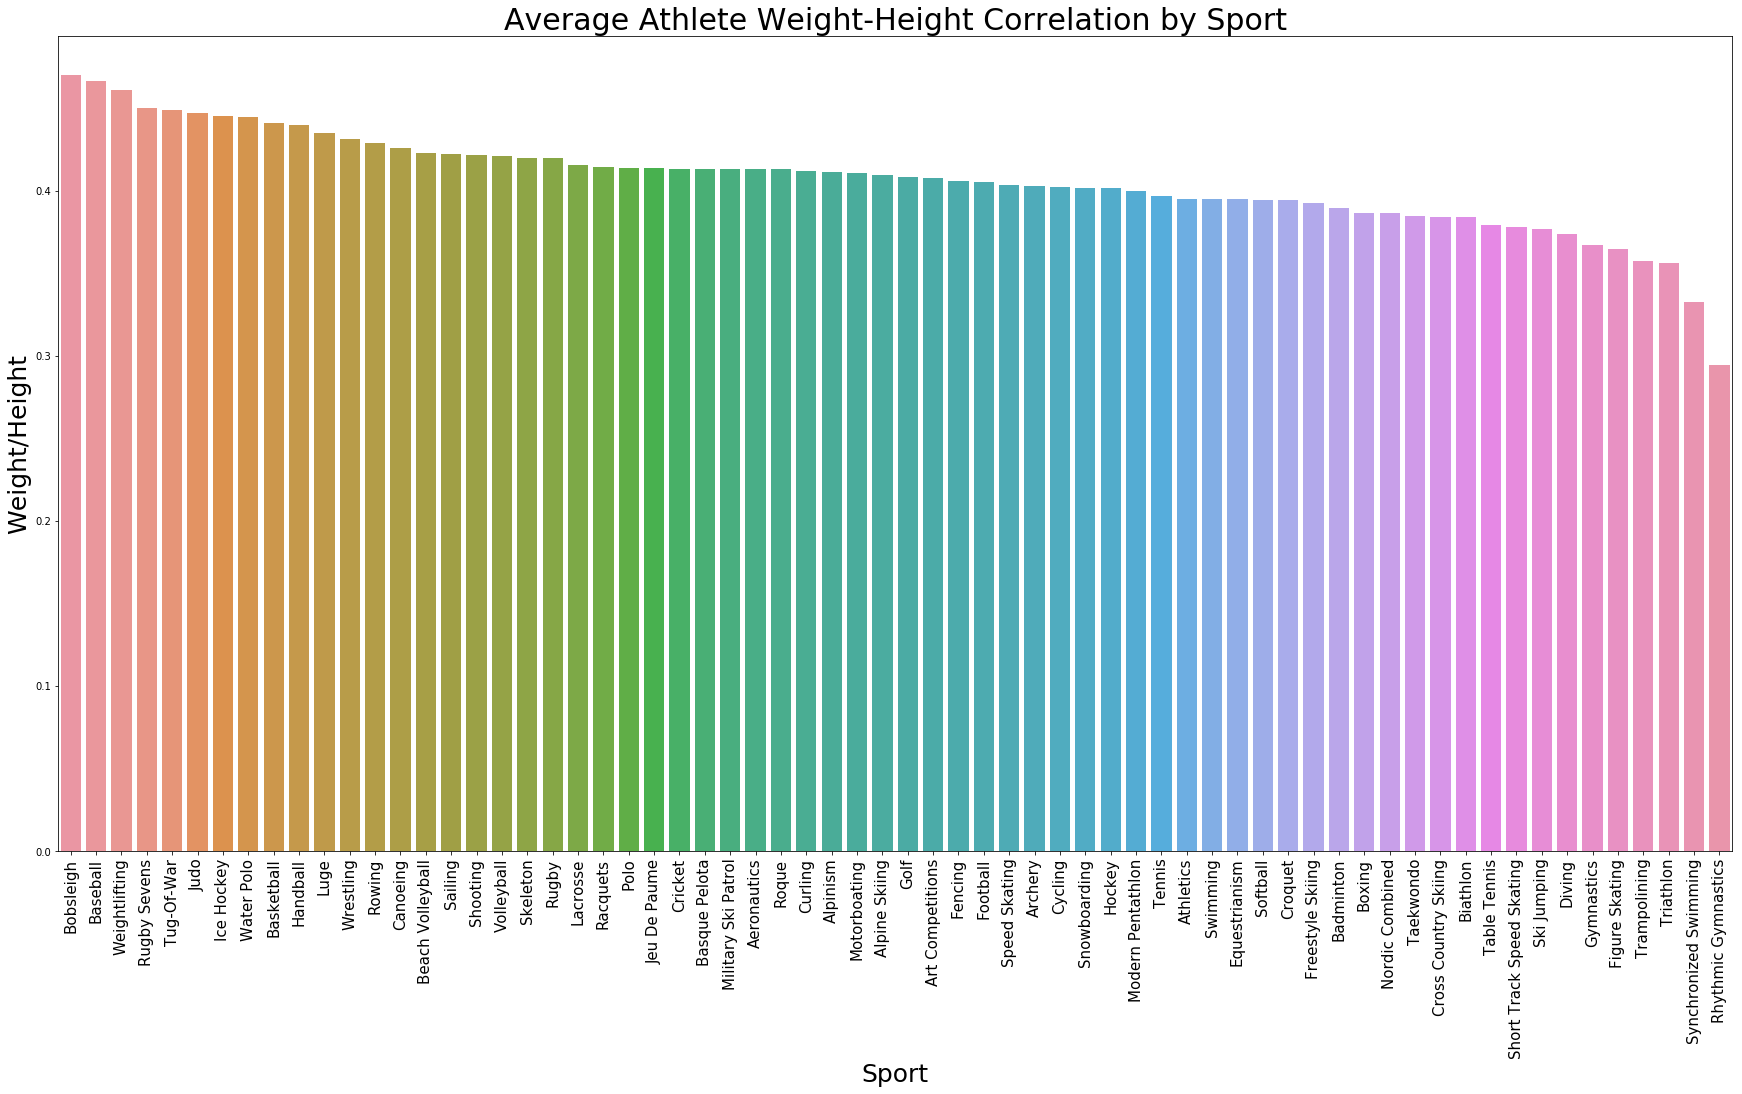

In [44]:
sport_mean_data['Weight/Height']=sport_mean_data['Weight']/sport_mean_data['Height']
sport_mean_data.sort_values('Weight/Height',ascending=False,inplace=True)
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(sport_mean_data['Sport'],sport_mean_data['Weight/Height'],ci=False)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('Weight/Height',size=25)
plt.title('Average Athlete Weight-Height Correlation by Sport',fontsize=30)
plt.show()

In [37]:
print('Average height-weight correlation of all athletes:',round(data.Weight.mean()/data.Height.mean(),3))

Average height-weight correlation of all athletes: 0.404


In the barplot above, sports are ranked in descending order based on average weight over average height. Similar to the trends noted above, we see bobsledders, baseball players, and weightlifters at the top of this list, while synchronized swimmers and rhythmic gymnasts fall to the bottom.

### Body Mass Index (BMI)

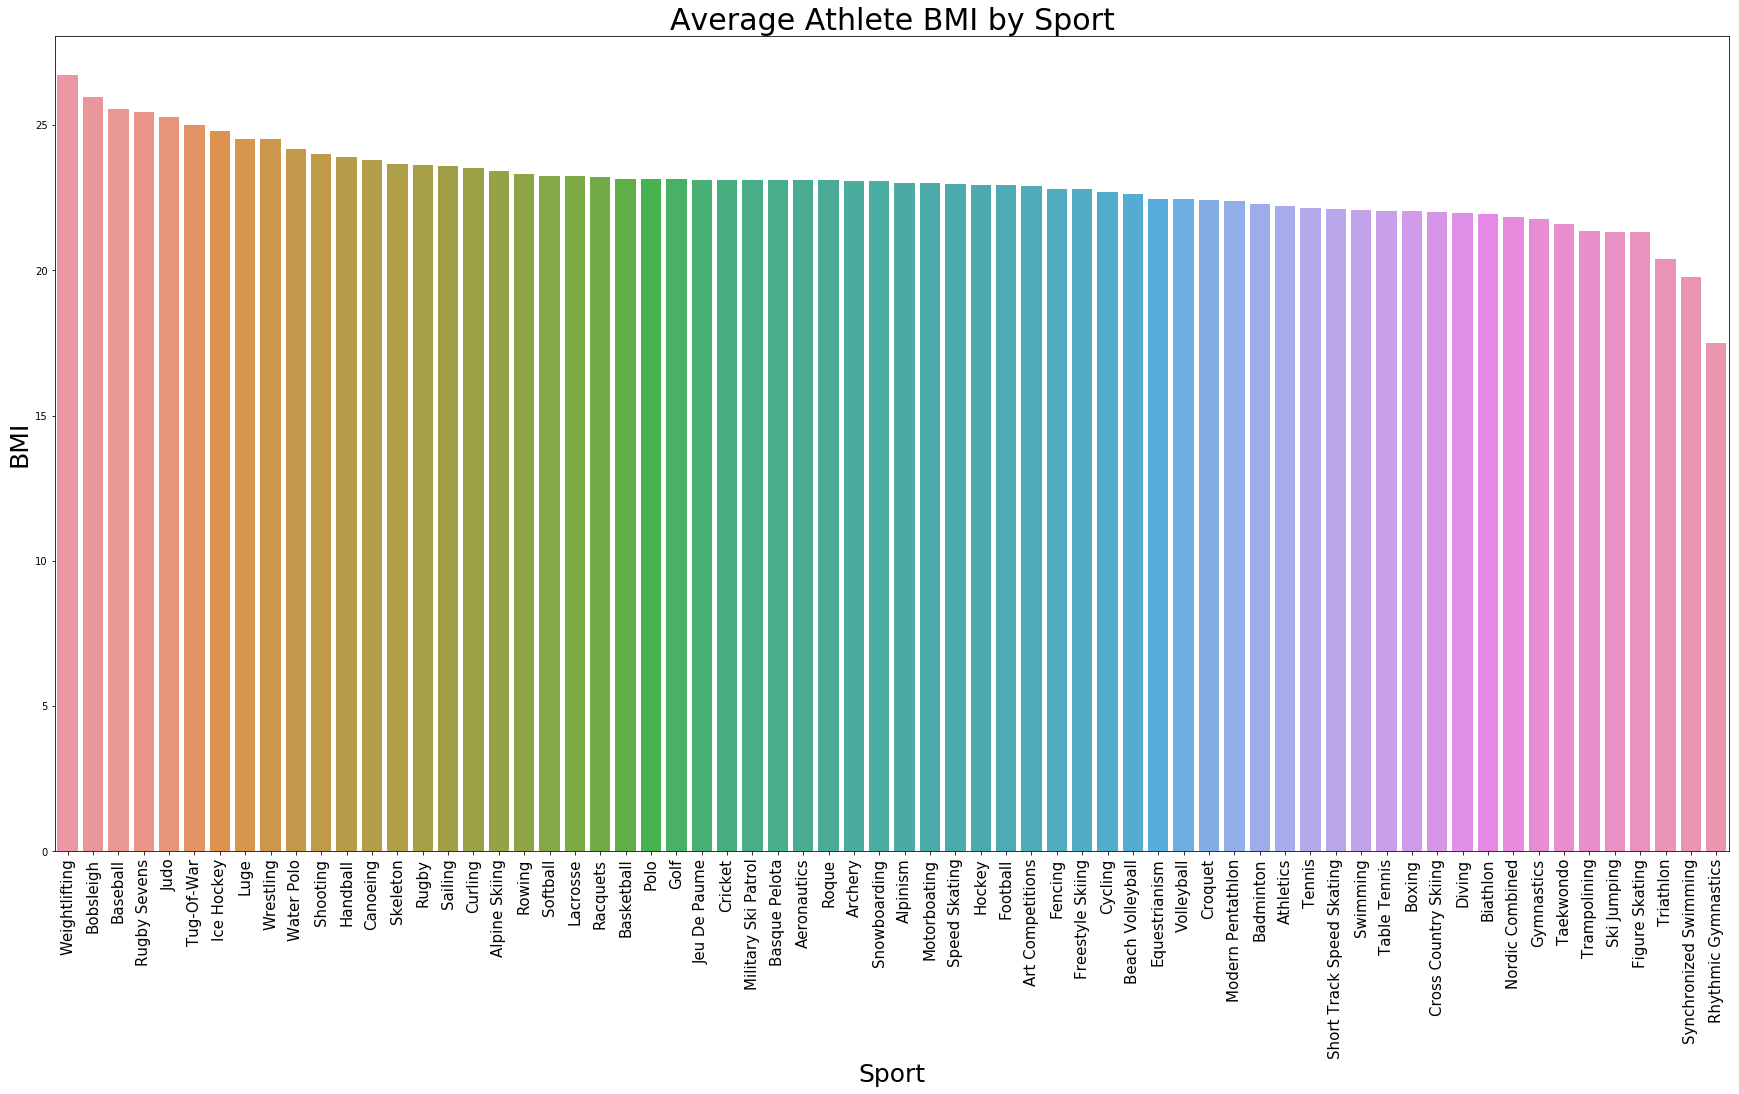

In [45]:
sport_mean_data.sort_values('BMI',ascending=False,inplace=True)
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(sport_mean_data['Sport'],sport_mean_data['BMI'],ci=False)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('BMI',size=25)
plt.title('Average Athlete BMI by Sport',fontsize=30)
plt.show()

In [46]:
print('Average BMI of all athletes:',round(data.BMI.mean(),2))

Average BMI of all athletes: 22.81


In [47]:
sport_mean_data[sport_mean_data.BMI>25]

,Sport,Age,Height,Weight,Year,BMI,Weight/Height
64,Weightlifting,25.423419,170.453391,78.565786,1980.595377,26.736001,0.460922
12,Bobsleigh,28.989863,180.810988,85.031557,1981.806409,25.955597,0.470279
7,Baseball,26.238255,182.406040,85.092282,2000.416107,25.539396,0.466499
45,Rugby Sevens,26.046823,175.314381,78.939799,2016.000000,25.449301,0.450276
32,Judo,25.316233,174.425941,77.968035,1997.195475,25.285526,0.446998
61,Tug-Of-War,27.935294,179.511765,80.611765,1909.552941,25.005090,0.449061


In [48]:
sport_mean_data[sport_mean_data.BMI<18.5]

,Sport,Age,Height,Weight,Year,BMI,Weight/Height
41,Rhythmic Gymnastics,18.737082,167.87538,49.430091,2003.161094,17.507576,0.294445


In the barplot above, sports are ranked in descending order based on average BMI, calculated earlier using the formula BMI = weight/height^2. Similar trends to the weight-height correlation can be observed here, with just some slight shifts. The average BMI of 22.81 falls right in the middle of "Normal or Healthy Weight" based on the CDC's standard adult weight categories. The CDC categorizes adults above 25.0 as "Overweight" and under 18.5 as "Underweight". Above we display the sports with average BMIs in both categories. This illuminates the potentional for  reevaluating and reshaping our society's understanding of weight, as many Olympians (adults typically considered as healthy and in peak physical shape) fall into these otherwise taboo categories.

## Are basketball players' height significantly greater than other athletes?

#### Ho (null hypothesis): A significant difference does **not** exist in height between basketball players and other athletes.
#### Ha (alternate hypothesis): A significant difference **does** exist in height between basketball players and other athletes.

Due to the substantial presence of missing values for height and weight in our Introduction section, we create new dataframes below that remove rows with these missing values, to avoid distributions that do not truly represent the data. Then, we will explore whether significant differences truly exist between athletes of certain sports with regards to height and weight.

In [49]:
nonnull_data = pd.read_csv('athlete_events.csv')
nonnull_data.Medal.fillna("None",inplace=True)
nonnull_age = nonnull_data.drop(nonnull_data[nonnull_data['Age'].isna()==True].index)
nonnull_weight = nonnull_data.drop(nonnull_data[nonnull_data['Weight'].isna()==True].index)
nonnull_height = nonnull_data.drop(nonnull_data[nonnull_data['Height'].isna()==True].index)

In [50]:
basketball_data = nonnull_height[nonnull_height.Sport=='Basketball']
nonbasketball_data = nonnull_height[nonnull_height.Sport!='Basketball']

Below, the height distributions illustrates the differences in basketball players' heights and the heights of other athletes, with the former shifted slightly higher than the latter. The spread for both categories appears to be fairly even, although, as expected, more high outliers for basketball players seem to be present.

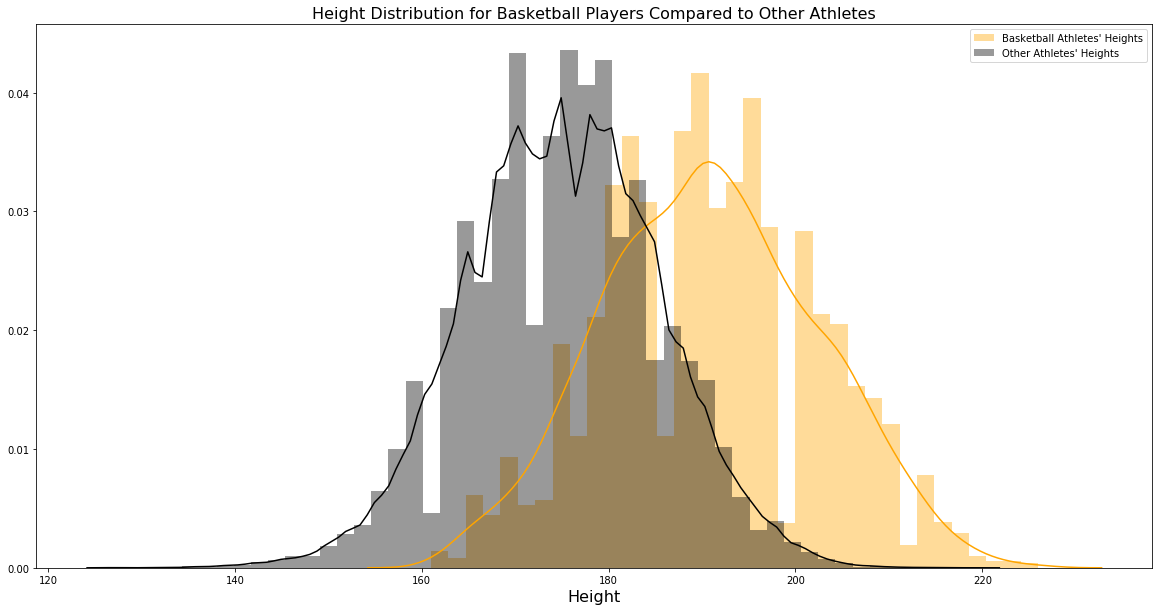

In [51]:
plt.figure(figsize=(20, 10))
sns.distplot(basketball_data['Height'], label="Basketball Athletes' Heights", color='orange')
sns.distplot(nonbasketball_data['Height'], label="Other Athletes' Heights", color='black')
plt.title('Height Distribution for Basketball Players Compared to Other Athletes', fontsize=16)
plt.xlabel('Height', fontsize=16)
plt.legend()
plt.show()

In [52]:
from scipy import stats
print('Normality of basketball player height distribution: ', stats.normaltest(basketball_data.Height))
print('Normality of other athlete height distribution: ', stats.normaltest(nonbasketball_data.Height))

Normality of basketball player height distribution:  NormaltestResult(statistic=38.31336532824803, pvalue=4.79025273377118e-09)
Normality of other athlete height distribution:  NormaltestResult(statistic=164.09857779248782, pvalue=2.3251265125100343e-36)


In [53]:
print(len(basketball_data.Height))
print(len(nonbasketball_data.Height))

3881
207064


With p-values under 0.05 for the normal test, niether distribution can be claimed as normal. However, due to the high number of samples in both datasets, we can proceed comfortably with a two-sample t-test to evaluate the siginficance of the difference in their means.

In [54]:
np.var(basketball_data['Height']) == np.var(nonbasketball_data['Height'])

False

In [55]:
print('T-Test Results for difference in basketball player height:',
      stats.ttest_ind(basketball_data['Height'], nonbasketball_data['Height'], equal_var=False))

T-Test Results for difference in basketball player height: Ttest_indResult(statistic=85.3743567778464, pvalue=0.0)


The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between the height of basketball players and other athletes. Next, we will explore the extent of this significant difference.

Text(0.5, 1.0, 'Average Height of Basketball Players Compared to Other Athletes')

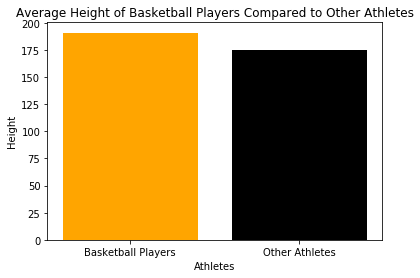

In [56]:
x = ['Basketball Players', 'Other Athletes']
y = [np.array(basketball_data.Height).mean(),np.array(nonbasketball_data.Height).mean()]
plt.bar(x,y,color=('orange','black'))
plt.ylabel('Height')
plt.xlabel('Athletes')
plt.title('Average Height of Basketball Players Compared to Other Athletes')

In [57]:
print('Average Basketball Player Height',np.array(basketball_data.Height).mean())
print('Average Height of Other Athletes',np.array(nonbasketball_data.Height).mean())
print('Difference in Means',np.array(basketball_data.Height).mean()-np.array(nonbasketball_data.Height).mean())

Average Basketball Player Height 190.86987889719146
Average Height of Other Athletes 175.04787408723874
Difference in Means 15.822004809952716


In [58]:
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    
    return d

In [60]:
Cohen_d(np.array(basketball_data.Height),np.array(nonbasketball_data.Height))

1.5359248602982871

With a difference in mean height of 15.82 cm, the height distributions for basketball players and all athletes lie 1.534 standard deviations apart, allowing us to claim a **large** effect size in the height difference. Basketball players are indeed significantly taller to a large extent!

## Are rythmic gymnasts significantly lighter than other athletes?

#### Ho (null hypothesis): A significant difference does **not** exist in weight between rhythmic gymnasts and other athletes.
#### Ha (alternate hypothesis): A significant difference **does** exist in weight between rhythmic gymnasts and other athletes.

In [61]:
rhythmic_data = nonnull_weight[nonnull_weight.Sport=='Rhythmic Gymnastics']
nonrhythmic_data = nonnull_weight[nonnull_weight.Sport!='Rhythmic Gymnastics']

Below, the weight distributions illustrates the differences in rhythmic gymnasts' weights and the weights of other athletes, with the former shifted slightly higher than the latter. Rhythmic gymnast weight seems to have a small spread than the weight distribution for all athletes.

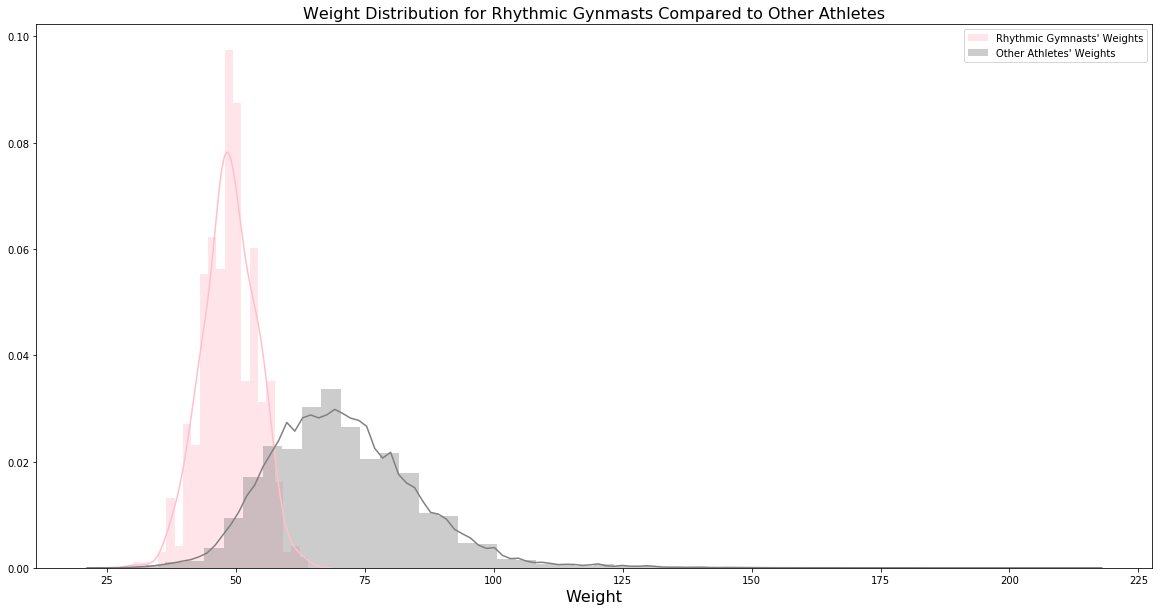

In [62]:
plt.figure(figsize=(20, 10))
sns.distplot(rhythmic_data['Weight'], label="Rhythmic Gymnasts' Weights", color='pink')
sns.distplot(nonrhythmic_data['Weight'], label="Other Athletes' Weights", color='grey')
plt.title('Weight Distribution for Rhythmic Gynmasts Compared to Other Athletes', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

In [63]:
print('Normality of rhythmic gymnast weight distribution: ', stats.normaltest(rhythmic_data.Weight))
print('Normality of other athlete weight distribution: ', stats.normaltest(nonrhythmic_data.Weight))

Normality of rhythmic gymnast weight distribution:  NormaltestResult(statistic=0.8965228569377197, pvalue=0.6387376779896403)
Normality of other athlete weight distribution:  NormaltestResult(statistic=27275.786829393815, pvalue=0.0)


In [64]:
print(len(rhythmic_data.Weight))
print(len(nonrhythmic_data.Weight))

615
207626


With a p-value of 0.639 for the normal test, the weight distribution for rhythmic gymnasts can be claimed as normal, allowing us to use it for the two-sample t-test. However, our other distribution, with a p-value under 0.05 for the normal test, cannont be claimed as normal. Luckily, due to the high number of samples in this dataset (over 200,000!), we can proceed comfortably with a two-sample t-test to evaluate the siginficance of the difference in their means.

In [65]:
np.var(rhythmic_data['Weight']) == np.var(nonrhythmic_data['Weight'])

False

In [66]:
print('T-Test Results for difference in male and female height:',
      stats.ttest_ind(rhythmic_data['Weight'], nonrhythmic_data['Weight'], equal_var=False))

T-Test Results for difference in male and female height: Ttest_indResult(statistic=-104.2367028457331, pvalue=0.0)


The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between the weight of rhythmic gymnasts and other athletes. Next, we will explore the extent of this significant difference.

Text(0.5, 1.0, 'Average Weight of Rhythmic Gymnasts Compared to Other Athletes')

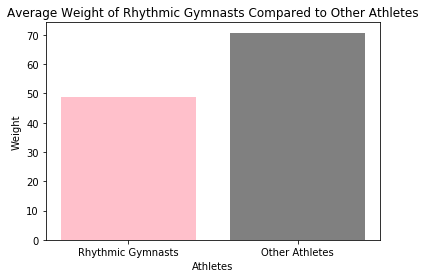

In [68]:
x = ['Rhythmic Gymnasts', 'Other Athletes']
y = [np.array(rhythmic_data.Weight).mean(),np.array(nonrhythmic_data.Weight).mean()]
plt.bar(x,y,color=('pink','grey'))
plt.ylabel('Weight')
plt.xlabel('Athletes')
plt.title('Average Weight of Rhythmic Gymnasts Compared to Other Athletes')

In [69]:
print('Average Rhythmic Gymnast Weight: ',np.array(rhythmic_data.Weight).mean())
print('Average Weight of Other Athletes: ',np.array(nonrhythmic_data.Weight).mean())
print('Difference in Means: ',np.array(rhythmic_data.Weight).mean()-np.array(nonrhythmic_data.Weight).mean())

Average Rhythmic Gymnast Weight:  48.760975609756095
Average Weight of Other Athletes:  70.76738462427635
Difference in Means:  -22.00640901452025


In [70]:
Cohen_d(np.array(rhythmic_data.Weight),np.array(nonrhythmic_data.Weight))

-1.5391028691565636

With a difference in mean weight of 22.01 kg, the weight distributions for rhythmic gymnasts and all athletes lie 1.540 standard deviations apart, allowing us to claim a **large** effect size in the weight difference. Rhythmic gymnasts are indeed significantly lighter to a large extent!

## Summary

In this section, we explored the changes in sports programming throughout the history of the modern Olympic Games and analyzed differences in average athlete characteristics based on each sport. We answered many questions about types of Olympic athletes, including:
- Which sports have had the most athletes over time?
- How do the average age, height, and weight differ for athletes of each sport?
- What trends exist in the height-weight correlation and BMI for athletes of each sport?
- Are basketball players' heights significantly greater than other athletes?
- Are rythmic gymnasts significantly lighter than other athletes?

Moving forward, it will be exciting to see where the decsions of the IOC push the direction of the Olympic Games. We might come to see events never before competed in at the Olympics, while simulatneously bidding adieu to some of our current favorites. Only time will tell! Regardless of these changes, one fact prevails above all: the Olympic Games will continue to form a cornerstone of our society's sports culture and entertainment.